<a href="https://colab.research.google.com/github/SARU230/Free-energy-surface-heat-map/blob/main/Free_Energy_Heat_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import matplotlib as mpl
import sys
import os
import matplotlib as mpl
import re
import glob

pwd=os.getcwd()

import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import argparse
from mpl_toolkits.axes_grid1 import make_axes_locatable

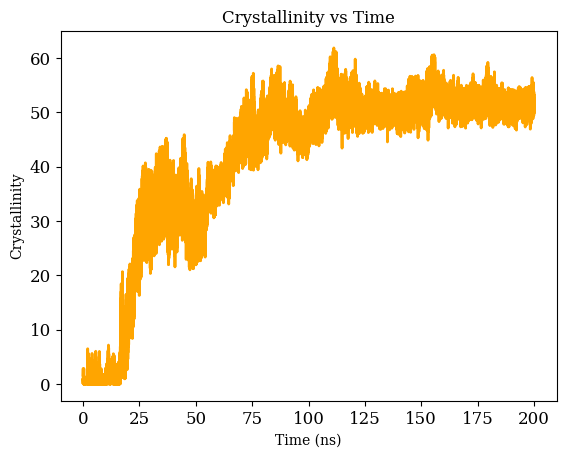

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

# Font settings
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 10}
plt.rc('font', **font)

def set_mysetting():
    mpl.rcParams["font.family"] = "serif"
    mpl.rcParams["legend.fontsize"] = "medium"
    plt.rc('xtick', labelsize=12)     # tick labels bigger
    plt.rc('ytick', labelsize=12)     # tick labels bigger
    plt.rc('lines', lw=2)             # thicker black lines
    # plt.rc('savefig', dpi=800)      # higher res output

set_mysetting()

# File names
S_name = "SLC"
H_name = "DCB"

# Read data
SS = pd.read_csv(S_name, skiprows=1, header=None, delimiter=' ', engine='python')
HH = pd.read_csv(H_name, skiprows=1, header=None, delimiter=' ', engine='python')

# Extract columns for plotting
time_S = SS.iloc[:, 1] / 1000  # Convert first column from ps to ns
S = SS.iloc[:, 3]              # Fourth column

time_H = HH.iloc[:, 1] / 1000  # Convert first column from ps to ns
H = HH.iloc[:, 2]              # Third column

# Plotting
plt.plot(time_S, S, color='orange', label='SLC')  # Plot S with time in ns


# Add labels, title, and legend
plt.xlabel('Time (ns)')  # Updated to ns
plt.ylabel('Crystallinity')
plt.title('Crystallinity vs Time')
#plt.legend()

# Show plot
plt.show()

Text(0.5, 1.0, 'Adsorption vs Time')

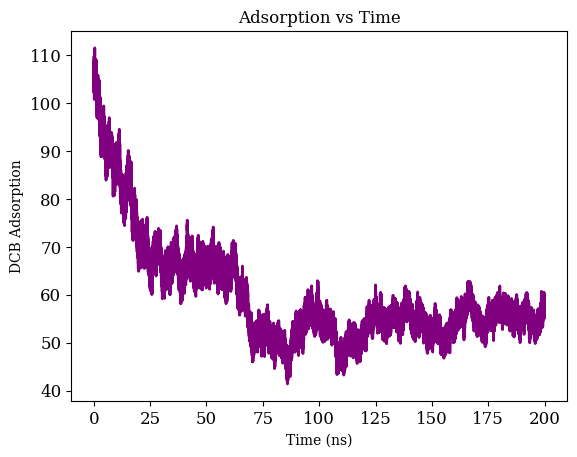

In [19]:
plt.plot(time_H, H, color='purple', label='DCB')  # Uncomment to plot H

plt.xlabel('Time (ns)')
plt.ylabel('DCB Adsorption')
plt.title('Adsorption vs Time')
#plt.legend()

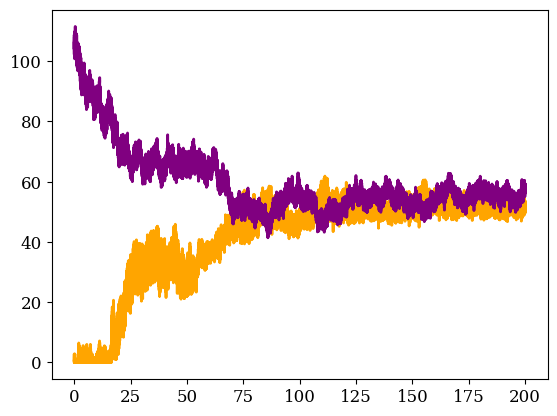

In [11]:
plt.plot(time_S, S, color='orange', label='SLC')  # Plot S with time in ns
plt.plot(time_H, H, color='purple', label='DCB')

In [14]:
def get_hist(): #THIS IS THE MAIN FUNCTION FOR FES - USE AS NEEDED
    #load data
    v1 = np.array(pd.DataFrame(S).stack()) #DES
    v2 = np.array(pd.DataFrame(H).stack()) #HEX
    ######## Reading in Data and determining span ###############
    i1 = 100 #bins
    i2 = 100 #bins
    V = np.zeros((i1,i2))
    V1 = np.zeros((i1))
    V2 = np.zeros((i2))
    DG = np.zeros((i1,i2))
    kB = 3.2976268E-24 #cal/K
    An = 6.02214179E23
    T = 298
    minv1 = min(v1)
    maxv1 = max(v2)
    minv2 = min(v1)
    maxv2 = max(v2)
    ################### Data span ####################
    I1 = maxv1 - minv1
    I2 = maxv2 - minv2

    for i in range(len(v1)):
        for x in range(i1):
            if v1[i] <= minv1+(x+1)*I1/i1 and v1[i] > minv1+x*I1/i1:
                V1[x] = V1[x] + 1
                break
    DG_s = -0.001*An*kB*T*(np.log(V1))
    DG_s = DG_s - DG_s[0]

    for i in range(len(v2)):
        for x in range(i1):
            if v2[i] <= minv2+(x+1)*I2/i2 and v2[i] > minv2+x*I2/i2:
                V2[x] = V2[x] + 1
                break
    DG_h = -0.001*An*kB*T*np.log(V2)
    DG_h = DG_h - DG_h.min()


    ##### Binning for FES
    for i in range(len(v1)):
     for x in range(i1):
         if v1[i] <= minv1+(x+1)*I1/i1 and v1[i] > minv1+x*I1/i1:
             for y in range(i2):
                 if v2[i] <= minv2+(y+1)*I2/i2 and v2[i] > minv2+y*I2/i2:
                     V[x][y] = V[x][y] +1
                     break
             break
    ##### Finding the maximum ##############
    P = list()
    for x in range(i1):
        for y in range(i2):
            P.append(V[x][y])
    Pmax = max(P)
    LnPmax = math.log(Pmax)
    #### Calculating Delta G values ##############

    #LnPstd = math.log(Pstd)
    for x in range(i1):
        for y in range(i2):
            if V[x][y] == 0:
                DG[x][y] = 20
                continue
            else:
                DG[x][y] = -0.001*An*kB*T*((math.log(V[x][y])-LnPmax)) #kcal/mol
    xi, yi = np.mgrid[minv1:maxv1:(i1)*1j, minv2:maxv2:(i2)*1j]
    return(DG, xi, yi, minv1, maxv1, minv2, maxv2, V, DG_s, DG_h)

Z11, X11, Y11, min1v11, max1v11, min1v21, max1v21, V11, s11, h11 = get_hist() #this calls the main function

<ipython-input-14-96d92f177ba9>:28: RuntimeWarning: divide by zero encountered in log
  DG_s = -0.001*An*kB*T*(np.log(V1))
<ipython-input-14-96d92f177ba9>:36: RuntimeWarning: divide by zero encountered in log
  DG_h = -0.001*An*kB*T*np.log(V2)


Text(0, 0.5, 'Free energy [kcal/mol]')

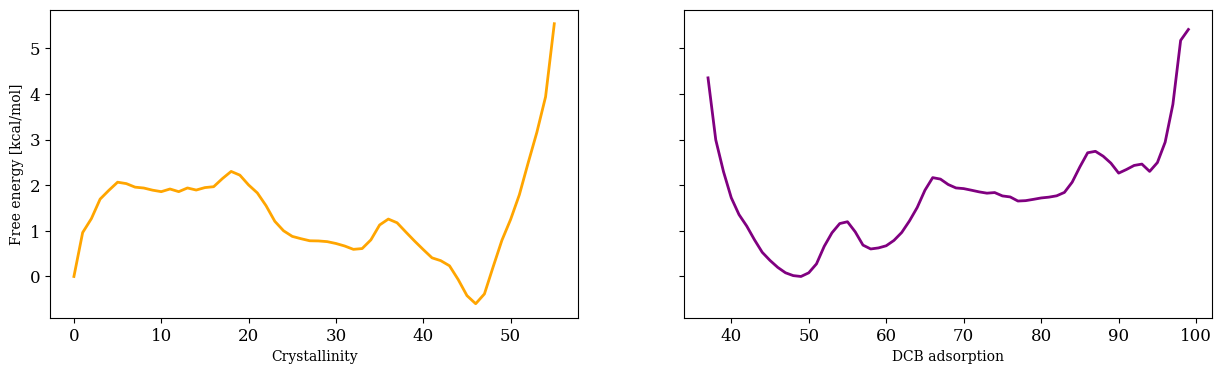

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15,4), sharey=True)

ax[0].plot(s11, color='orange')
ax[1].plot(h11, color='purple')
ax[0].set_xlabel('Crystallinity')
ax[1].set_xlabel('DCB adsorption')
ax[0].set_ylabel('Free energy [kcal/mol]')
#ax[0].set_xlim(0 , 150)

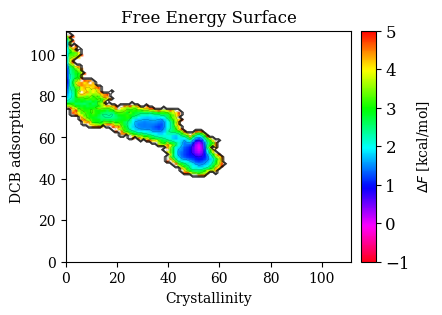

In [16]:
Cmap2 = plt.get_cmap('hsv')
Cmap2 = Cmap2.reversed()
Cmap2.set_over('white')

fig, ax = plt.subplots(1, 1, figsize=(4,3))


#fig = plt.plot(figsize=(21, 5))

# Details for the BAR
vmin = -1
vmax = 5

#CHECK THESE

im1 = ax.imshow(Z11.T-Z11[:,:].min(), cmap=Cmap2, extent=[min1v11,max1v11,min1v21,max1v21], origin='lower', aspect='auto', vmin=vmin, vmax=vmax)
ax.contour(X11, Y11, Z11, 28, colors=['black'], linewidths=0.1)
divider = make_axes_locatable(plt.gca())


#google matplotlib colormaps for color schemes other than "plasma"
ax.set_title("Free Energy Surface")
ax.set_xlabel('Crystallinity')
ax.set_ylabel('DCB adsorption')
#ax.set_ylim(2100, 3000)
#ax.set_xlim(0,100)
ax.tick_params(axis='both', which='major', labelsize=10)
cax = divider.append_axes("right", size="5%", pad=0.1)


#Cmap = 'Spectral'
cbar = plt.colorbar(im1, cax=cax)
cbar.set_ticks([-1, 0, 1, 2, 3, 4, 5])
cbar.ax.tick_params(labelsize=12)

z_l = r'$\Delta F$'+' [kcal/mol]' #using latex in matplotlib
cbar.set_label(z_l,size=10)